In [25]:
# Reads HDF5 files in Python
import h5py

In [26]:
small_file = "mwc/20200302_Control1256_Day20_of_recording_mwc.h5"   # Contains no datasets
big_file = "C:/Users/jveer/OneDrive - UvA/Bureaublad/hogeschool/Afstudeerstage BMT jaar 5/Programmas/Testdata/20250127_SCA1_first_test(001).h5"     # Contains 24 datasets, and multiple groups in groups starting with ['Data']['Recording_0']

In [27]:
# Gets every H5 group
def print_hdf5_groups(file_data, group_path=""):
    # Loops through every group
    for key in file_data.keys():
        print(f"HDF5 data: {file_data}\n")
        new_group_path = f"{group_path}/{key}" if group_path else key
        print(f"Data path: {new_group_path}")
        # Checks if a group has another group or dataset
        if isinstance(file_data[key], h5py.Group):
            print_hdf5_groups(file_data[key], new_group_path)

# Usage
file = h5py.File(big_file, 'r')
info = print_hdf5_groups(file)
file.close()

HDF5 data: <HDF5 file "20250127_SCA1_first_test(001).h5" (mode r)>

Data path: Data
HDF5 data: <HDF5 group "/Data" (1 members)>

Data path: Data/Recording_0
HDF5 data: <HDF5 group "/Data/Recording_0" (1 members)>

Data path: Data/Recording_0/AnalogStream
HDF5 data: <HDF5 group "/Data/Recording_0/AnalogStream" (1 members)>

Data path: Data/Recording_0/AnalogStream/Stream_0
HDF5 data: <HDF5 group "/Data/Recording_0/AnalogStream/Stream_0" (1 members)>

Data path: Data/Recording_0/AnalogStream/Stream_0/ChannelData


In [ ]:
# First and second groups exist of 1 value
first_group = "Data"
second_group = "Recording_0"
dataset_count = 1

print("All H5 datasets:")
# Open the HDF5 file
with h5py.File(big_file, "r") as file_data:

    # Get the third group in the hdf5 file
    path_2 = file_data[first_group][second_group]
    for third_group in path_2.keys():      

        # Get the fourth group in the hdf5 file
        path_3 = path_2[third_group]
        for fourth_group in path_3.keys():      

            # Get the fifth group in the hdf5 file
            path_4 = path_3[fourth_group]
            for fifth_group in path_4.keys():

                # Returns HDF5 dataset objects
                dataset = path_4[fifth_group] # Path 5
                print (f"Dataset {dataset_count}: {dataset}")
                
                # Convert to numpy array: (Adding [:] returns a numpy array)
                data = dataset[:] 
                print (data, "\n")
                dataset_count += 1

All H5 datasets:
dataset type: <class 'h5py._hl.dataset.Dataset'>
Dataset 1: <HDF5 dataset "ChannelData": shape (768, 296875), type "<f8">
[[-3.83940325e-07 -3.29091707e-07 -2.74243089e-07 ...  1.70030715e-06
   2.96182536e-06  3.07152260e-06]
 [ 3.07152260e-06  2.41333918e-06  1.48091268e-06 ...  3.62000878e-06
   3.62000878e-06  2.63273366e-06]
 [ 4.22334357e-06  4.49758666e-06  4.77182975e-06 ...  1.04212374e-06
   1.20666959e-06  6.03334796e-07]
 ...
 [ 5.48486178e-07  1.64545853e-07 -0.00000000e+00 ...  6.03334796e-07
  -4.93637560e-07 -7.13032032e-07]
 [ 2.13909609e-06  1.97455024e-06  1.26151821e-06 ... -1.59060992e-06
  -1.09697236e-06 -9.87275121e-07]
 [-2.08424748e-06 -9.87275121e-07 -0.00000000e+00 ... -5.15577007e-06
  -5.97849934e-06 -6.69153137e-06]] 



In [47]:
# Open the HDF5 file
with h5py.File(big_file, "r") as file_data:

    # Returns HDF5 dataset objects
    dataset = file_data["Data"]["Recording_0"]["AnalogStream"]["Stream_0"]["ChannelData"] 
    print (f"dataset: {dataset}")

    # Convert to numpy array: (Adding [:] returns a numpy array)
    print("Data:\n###\n")
    data = dataset[:] 
    print (data.shape, data.dtype)
    print (data)

dataset: <HDF5 dataset "ChannelData": shape (768, 296875), type "<f8">
Data:
###

(768, 296875) float64
[[-3.83940325e-07 -3.29091707e-07 -2.74243089e-07 ...  1.70030715e-06
   2.96182536e-06  3.07152260e-06]
 [ 3.07152260e-06  2.41333918e-06  1.48091268e-06 ...  3.62000878e-06
   3.62000878e-06  2.63273366e-06]
 [ 4.22334357e-06  4.49758666e-06  4.77182975e-06 ...  1.04212374e-06
   1.20666959e-06  6.03334796e-07]
 ...
 [ 5.48486178e-07  1.64545853e-07 -0.00000000e+00 ...  6.03334796e-07
  -4.93637560e-07 -7.13032032e-07]
 [ 2.13909609e-06  1.97455024e-06  1.26151821e-06 ... -1.59060992e-06
  -1.09697236e-06 -9.87275121e-07]
 [-2.08424748e-06 -9.87275121e-07 -0.00000000e+00 ... -5.15577007e-06
  -5.97849934e-06 -6.69153137e-06]]


In [30]:
data[:10, :10]

array([[-3.83940325e-07, -3.29091707e-07, -2.74243089e-07,
        -3.29091707e-07, -1.09697236e-07,  6.03334796e-07,
         1.64545853e-06,  1.91970162e-06,  9.87275121e-07,
        -6.58183414e-07],
       [ 3.07152260e-06,  2.41333918e-06,  1.48091268e-06,
         6.58183414e-07,  7.67880649e-07,  1.86485301e-06,
         3.18121983e-06,  3.40061430e-06,  2.41333918e-06,
         4.93637560e-07],
       [ 4.22334357e-06,  4.49758666e-06,  4.77182975e-06,
         4.44273804e-06,  4.27819219e-06,  4.66213251e-06,
         5.75910487e-06,  6.36243967e-06,  5.59455902e-06,
         3.89425186e-06],
       [ 1.42606406e-06,  1.86485301e-06,  2.63273366e-06,
         3.18121983e-06,  3.56516016e-06,  3.94910048e-06,
         4.55243528e-06,  4.49758666e-06,  4.05879772e-06,
         2.96182536e-06],
       [ 7.45941202e-06,  7.56910926e-06,  7.34971479e-06,
         6.25274243e-06,  5.43001316e-06,  6.30759105e-06,
         8.33698991e-06,  9.59850812e-06,  8.88547609e-06,
         6.

In [31]:
data[0].min()

-1.656428258007898e-05

In [32]:
data[0].max()

1.3218516893374287e-05

#### Visualisation of First MEA electrode

In [33]:
import matplotlib.pyplot as plt
import numpy as np

In [34]:
# Enlarge size of plot figure
plt.rcParams["figure.figsize"] = (22,5)

In [35]:
print("Shape of MEA dataset:", data.shape)
print("\nData of MEA electrode:\n", data[:100, :100])

Shape of MEA dataset: (768, 296875)

Data of MEA electrode:
 [[-3.83940325e-07 -3.29091707e-07 -2.74243089e-07 ... -1.09697236e-06
  -8.22729267e-07 -8.22729267e-07]
 [ 3.07152260e-06  2.41333918e-06  1.48091268e-06 ... -2.19394471e-06
  -2.13909609e-06 -2.24879333e-06]
 [ 4.22334357e-06  4.49758666e-06  4.77182975e-06 ...  3.83940325e-07
   8.77577885e-07  1.64545853e-06]
 ...
 [-3.34576569e-06 -2.52303642e-06 -8.77577885e-07 ... -3.29091707e-07
  -5.48486178e-08 -2.74243089e-07]
 [-3.07152260e-06 -3.07152260e-06 -2.79727951e-06 ...  8.77577885e-07
   1.09697236e-07 -1.09697236e-06]
 [-4.93637560e-07 -4.93637560e-07 -4.38788943e-07 ...  8.77577885e-07
  -2.19394471e-07 -1.31636683e-06]]


In [36]:
hertz = 20000
measurements = len(data)

# Calculate time for x data
time_seconds = np.arange(0, measurements) / hertz
time_seconds

array([0.000e+00, 5.000e-05, 1.000e-04, 1.500e-04, 2.000e-04, 2.500e-04,
       3.000e-04, 3.500e-04, 4.000e-04, 4.500e-04, 5.000e-04, 5.500e-04,
       6.000e-04, 6.500e-04, 7.000e-04, 7.500e-04, 8.000e-04, 8.500e-04,
       9.000e-04, 9.500e-04, 1.000e-03, 1.050e-03, 1.100e-03, 1.150e-03,
       1.200e-03, 1.250e-03, 1.300e-03, 1.350e-03, 1.400e-03, 1.450e-03,
       1.500e-03, 1.550e-03, 1.600e-03, 1.650e-03, 1.700e-03, 1.750e-03,
       1.800e-03, 1.850e-03, 1.900e-03, 1.950e-03, 2.000e-03, 2.050e-03,
       2.100e-03, 2.150e-03, 2.200e-03, 2.250e-03, 2.300e-03, 2.350e-03,
       2.400e-03, 2.450e-03, 2.500e-03, 2.550e-03, 2.600e-03, 2.650e-03,
       2.700e-03, 2.750e-03, 2.800e-03, 2.850e-03, 2.900e-03, 2.950e-03,
       3.000e-03, 3.050e-03, 3.100e-03, 3.150e-03, 3.200e-03, 3.250e-03,
       3.300e-03, 3.350e-03, 3.400e-03, 3.450e-03, 3.500e-03, 3.550e-03,
       3.600e-03, 3.650e-03, 3.700e-03, 3.750e-03, 3.800e-03, 3.850e-03,
       3.900e-03, 3.950e-03, 4.000e-03, 4.050e-03, 

In [37]:
np.std(data[8][:measurements])*4

1.1093024424887611e-05

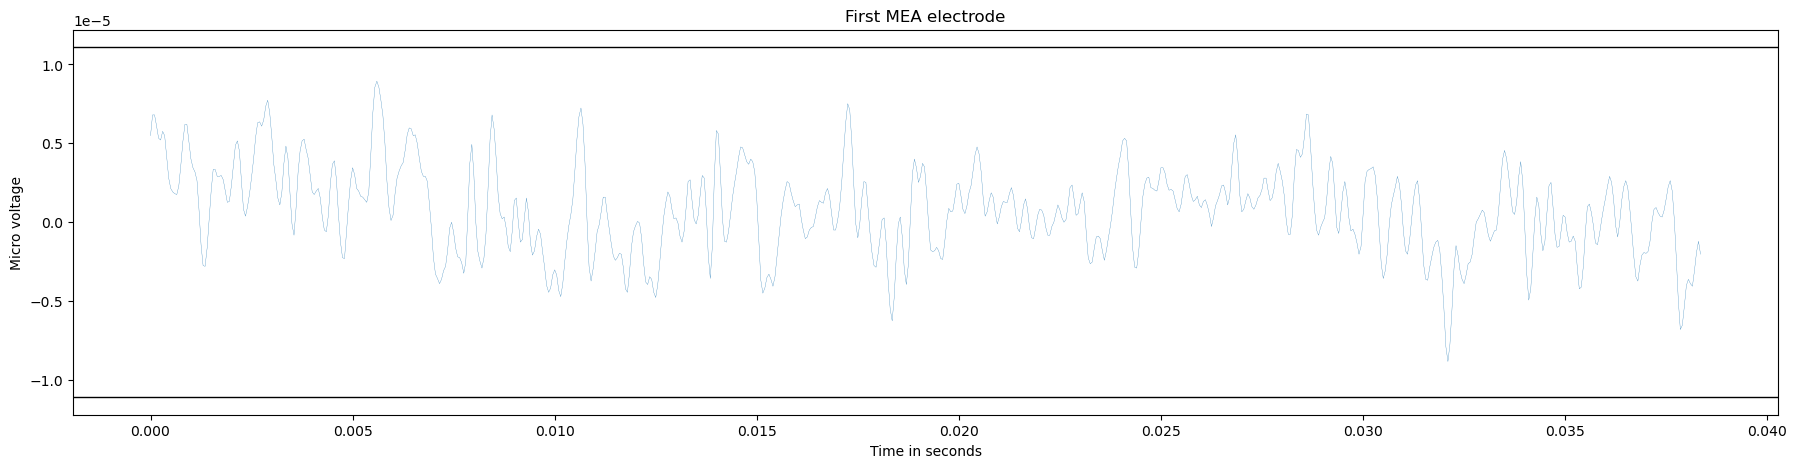

In [42]:
# Get all of the data of the first data row
first_data_row = data[8][:measurements]

# Plot first MEA electrode over time
plt.plot(time_seconds, first_data_row, linewidth = 0.2)

# The threshold will be used to detect the baseline noise
# Set the threshold to the average value of the standard deviations per channel
threshold = np.std(first_data_row)*4

# Plot the threshold
plt.axhline(y=threshold, color='k', linestyle='-', linewidth=1) 
plt.axhline(y=-threshold, color='k', linestyle='-', linewidth=1) 

# Identify points above and beneath the threshold
above_threshold = first_data_row > threshold
beneath_threshold = first_data_row < -threshold
# Plot red dots for values above the threshold
plt.scatter(time_seconds[above_threshold], first_data_row[above_threshold], color='red', marker='o', s=0.5)
plt.scatter(time_seconds[beneath_threshold], first_data_row[beneath_threshold], color='red', marker='o', s=0.5)

# Plot layout
plt.title("First MEA electrode")
plt.xlabel("Time in seconds")
plt.ylabel("Micro voltage")
# plt.xlim([time_seconds.min(), time_seconds.max()])
# plt.ylim([-500, 300])
plt.show()

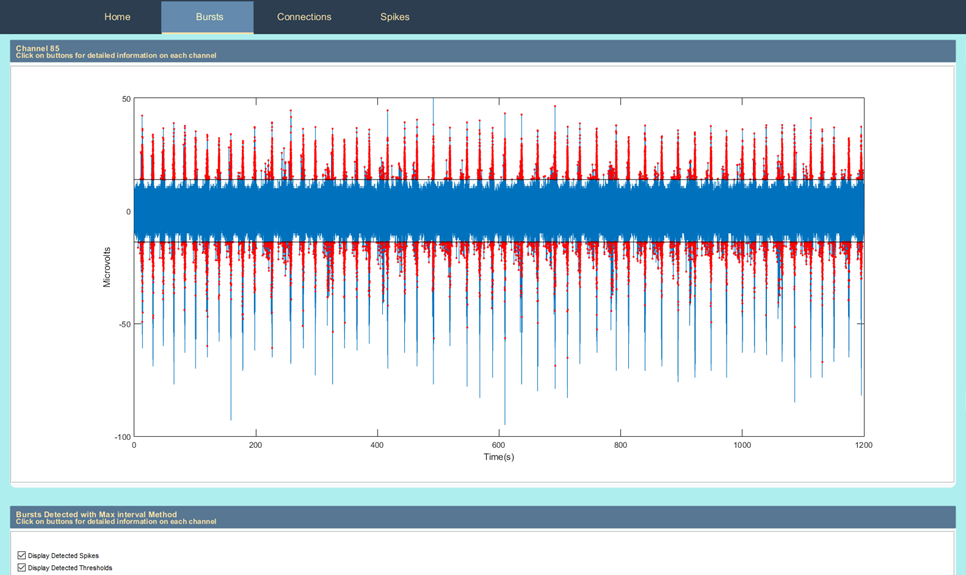

#### Plot all MEA electrodes

In [39]:
# Plot all voltage traces and spikes from the MEA electrode
def plot_MEA_electrode(MEA_electrode, measurements=30000000, threshold=120):
    # Get all of the data of a particular row
    data_row = data[MEA_electrode][:measurements]

    # Plot first MEA electrode over time
    plt.plot(time_seconds, data_row, linewidth = 0.2)


    # The threshold will be used to detect the baseline noise
    # Set the threshold to the average value of the standard deviations per channel
    threshold = np.std(data_row)*4
    # Plot the threshold
    plt.axhline(y=threshold, color='k', linestyle='-', linewidth=1) 
    plt.axhline(y=-threshold, color='k', linestyle='-', linewidth=1) 

    # Identify points above and beneath the threshold
    above_threshold = data_row > threshold
    beneath_threshold = data_row < -threshold
    # Plot red dots for values above the threshold
    plt.scatter(time_seconds[above_threshold], data_row[above_threshold], color='red', marker='o', s=0.5)
    plt.scatter(time_seconds[beneath_threshold], data_row[beneath_threshold], color='red', marker='o', s=0.5)

    # Calculate MEA electrode
    electrode = MEA_electrode % 12 + 1
    well = round(MEA_electrode / 12 + 0.505)

    # Plot layout
    plt.title(f"Well {well} - MEA electrode {electrode}")
    plt.xlabel("Time in seconds")
    plt.ylabel("Micro voltage")
    plt.xlim([time_seconds.min(), time_seconds.max()])
    plt.ylim([-500, 300])
    plt.show()

ValueError: x and y must have same first dimension, but have shapes (768,) and (296875,)

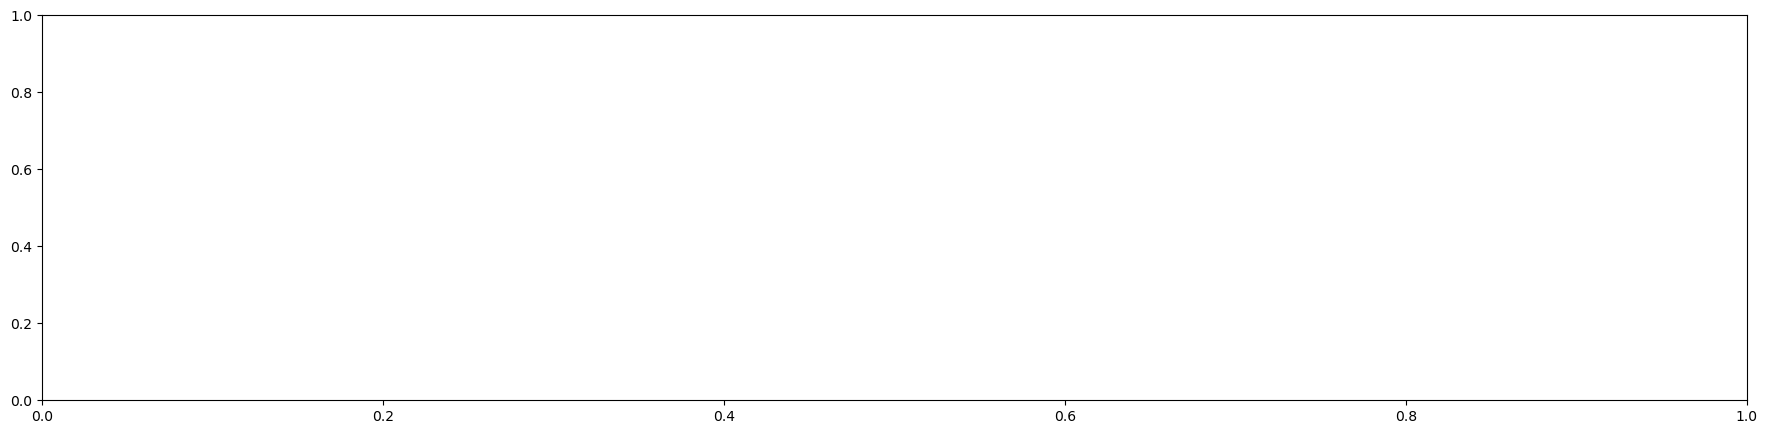

In [40]:
MEA_electrodes = range(data.shape[0])
# Plot all MEA electrodes
for MEA_electrode in MEA_electrodes:
    plot_MEA_electrode(MEA_electrode)